<a href="https://colab.research.google.com/github/lucienrivat/PommePOire/blob/main/PommePoir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dossier des images Apple : /content/datasets
Dossier des images Pear : /content/datasets/pear
Chemin absolu Apple : /content/datasets
Chemin absolu Pear : /content/datasets/pear
Contenu du dossier Apple : [PosixPath('/content/datasets/pear'), PosixPath('/content/datasets/Apple')]
Nombre d'images Apple trouvées : 466
Nombre d'images Pear trouvées : 5252
Found 5708 files belonging to 2 classes.
Using 4567 files for training.
Found 5708 files belonging to 2 classes.
Using 1141 files for validation.
Found 5252 files belonging to 10 classes.
Using 4202 files for training.
Found 5252 files belonging to 10 classes.
Using 1050 files for validation.


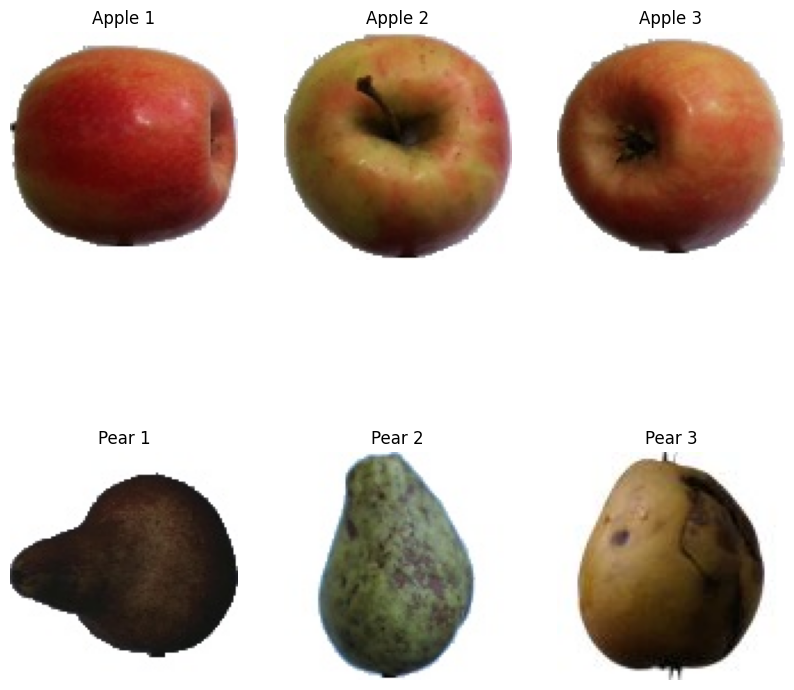

In [39]:
# Import dataset
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf
import pathlib
import os
import zipfile
import random

# Télécharger le fichier ZIP Apple depuis GitHub
apple_zip = tf.keras.utils.get_file(
    "Apple.zip",
    "https://github.com/lucienrivat/PommePOire/raw/main/Apple.zip",
    extract=False
)

# Télécharger le fichier ZIP Pear depuis GitHub
pear_zip = tf.keras.utils.get_file(
    "Pear.zip",
    "https://github.com/lucienrivat/PommePOire/raw/main/pear.zip",
    extract=False
)

# Extraire les fichiers ZIP dans /content/datasets
with zipfile.ZipFile(apple_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets/')

with zipfile.ZipFile(pear_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets/')

# Définir les chemins des dossiers contenant les images
apple_data_dir = pathlib.Path('/content/datasets/')
pear_data_dir = pathlib.Path('/content/datasets/pear/')

print("Dossier des images Apple :", apple_data_dir)
print("Dossier des images Pear :", pear_data_dir)
print("Chemin absolu Apple :", os.path.abspath(apple_data_dir))
print("Chemin absolu Pear :", os.path.abspath(pear_data_dir))

# Vérifier les fichiers dans le dossier Apple
print(f"Contenu du dossier Apple : {list(apple_data_dir.glob('*'))}")

# Compter le nombre d'images dans chaque dataset
apple_image_count = len(list(apple_data_dir.glob('*/*')))  # Cherche dans tous les sous-dossiers aussi
pear_image_count = sum([len(list(pear_data_dir.glob(f'{folder}/*'))) for folder in os.listdir(pear_data_dir)])

print("Nombre d'images Apple trouvées :", apple_image_count)
print("Nombre d'images Pear trouvées :", pear_image_count)

# Définir les paramètres du dataset
batch_size = 3
img_height = 200
img_width = 200

# Charger les datasets Apple
train_apple_data = tf.keras.preprocessing.image_dataset_from_directory(
  apple_data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
)

val_apple_data = tf.keras.preprocessing.image_dataset_from_directory(
  apple_data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
)

# Charger les datasets Pear (en utilisant les sous-dossiers)
train_pear_data = tf.keras.preprocessing.image_dataset_from_directory(
  pear_data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
)

val_pear_data = tf.keras.preprocessing.image_dataset_from_directory(
  pear_data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
)

# Afficher des images aléatoires d'Apple et Pear
plt.figure(figsize=(10, 10))
images_to_display = []

# Sélectionner 3 images aléatoires d'Apple
for _ in range(3):
    apple_image = random.choice(list(apple_data_dir.glob('*/*.jpg')))
    img_apple = mpimg.imread(apple_image)
    images_to_display.append(img_apple)

# Sélectionner 3 images aléatoires de Pear (à partir de sous-dossiers)
pear_subfolders = [folder for folder in os.listdir(pear_data_dir) if os.path.isdir(os.path.join(pear_data_dir, folder))]

for _ in range(3):
    chosen_pear_folder = random.choice(pear_subfolders)
    pear_images = list(pathlib.Path(pear_data_dir, chosen_pear_folder).glob('*.*'))
    random_pear_image = random.choice(pear_images)
    img_pear = mpimg.imread(random_pear_image)
    images_to_display.append(img_pear)

# Afficher les images sélectionnées
for i, img in enumerate(images_to_display):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.axis("off")
    if i < 3:
        plt.title(f"Apple {i + 1}")
    else:
        plt.title(f"Pear {i - 2}")
plt.show()


In [43]:
from tensorflow.keras import layers

num_classes = 2

model = tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(128,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],)

logdir="logs"

tensorboard_callback = keras.callbacks.TensorBoard(
    log_dir=logdir,
    histogram_freq=1,
    write_images=True
)


model.fit(
    train_data,
  validation_data=val_data,
  epochs=2,
  callbacks=[tensorboard_callback]
)

Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


122/122 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.9561 - loss: 0.0480 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/2
122/122 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [44]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 197, 197, 128)       │           6,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 98, 98, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 95, 95, 64)          │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 47, 47, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 44, 44, 32)          │          32,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 22, 22, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 19, 19, 16)          │           8,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 9, 9, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1296)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          83,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 784,664 (2.99 MB)

 Trainable params: 261,554 (1021.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 523,110 (2.00 MB)

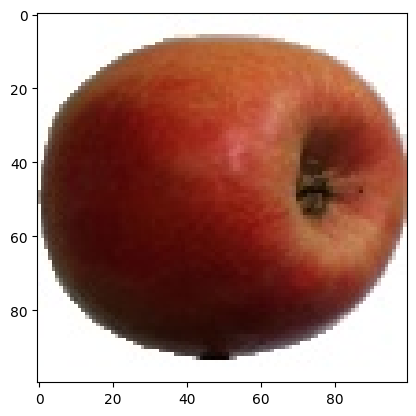

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Prediction : [[1. 0.]]
C'est une pomme !


In [55]:
from google.colab import files
import cv2
import numpy as np
import pathlib
import random
import matplotlib.pyplot as plt
import os

# Définir les chemins des dossiers contenant les images
apple_data_dir = pathlib.Path('/content/datasets/')
pear_data_dir = pathlib.Path('/content/datasets/pear/')

# Choisir une image aléatoire entre Apple et Pear
source = random.choice(['apple', 'pear'])  # Choisir au hasard entre Apple et Pear

if source == 'apple':
    # Choisir une image aléatoire dans le dossier Apple
    random_apple_image = random.choice(list(apple_data_dir.glob('*/*.jpg')))
    image_apple = cv2.imread(str(random_apple_image))
    plt.imshow(cv2.cvtColor(image_apple, cv2.COLOR_BGR2RGB))
    plt.show()
    img_to_predict = np.expand_dims(cv2.resize(image_apple, (200, 200)), axis=0)
    res = model.predict(img_to_predict)
    print(f"Prediction : {res}")
    print("C'est une pomme !")
elif source == 'pear':
    # Choisir un sous-dossier de Pear de manière aléatoire
    pear_subfolders = [folder for folder in os.listdir(pear_data_dir) if os.path.isdir(os.path.join(pear_data_dir, folder))]
    chosen_pear_folder = random.choice(pear_subfolders)

    # Lister les images dans le sous-dossier choisi
    pear_images = list(pathlib.Path(pear_data_dir, chosen_pear_folder).glob('*/*.jpg'))

    # Vérifier s'il y a des images disponibles dans pear_images
    if pear_images:
        # Sélectionner une image aléatoire du sous-dossier Pear
        random_pear_image = random.choice(pear_images)
        image_pear = cv2.imread(str(random_pear_image))
        plt.imshow(cv2.cvtColor(image_pear, cv2.COLOR_BGR2RGB))
        plt.show()
        img_to_predict = np.expand_dims(cv2.resize(image_pear, (200, 200)), axis=0)
        res = model.predict(img_to_predict)
        print(f"Prediction : {res}")
        print("C'est une poire !")
    else:
        print(f"Aucune image trouvée dans le sous-dossier '{chosen_pear_folder}'")
